### Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [233]:
!curl -o BostonHousing.csv https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35735  100 35735    0     0   104k      0 --:--:-- --:--:-- --:--:--  105k


In [234]:
#Variables in order:
# CRIM     per capita crime rate by town
# ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS    proportion of non-retail business acres per town
# CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX      nitric oxides concentration (parts per 10 million)
# RM       average number of rooms per dwelling
# AGE      proportion of owner-occupied units built prior to 1940
# DIS      weighted distances to five Boston employment centres
# RAD      index of accessibility to radial highways
# TAX      full-value property-tax rate per $10,000
# PTRATIO  pupil-teacher ratio by town
# B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT    % lower status of the population
# MEDV     Median value of owner-occupied homes in $1000's


In [235]:
df = pd.read_csv('BostonHousing.csv')
df1 = df.drop(columns=['medv'])       # drop dependent variable medv
X = df1
y = df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [236]:
df_train = pd.concat([X_train, y_train],axis=1)
df_train.shape

df_train = df_train.set_index(np.arange(0,404))

In [237]:
df_train.head()

crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
0  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
1   0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
2   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
3   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
4   0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   

   ptratio       b  lstat  medv  
0     20.2  349.48  24.91  12.0  
1     21.0  395.62   8.47  19.9  
2     16.9  362.25   7.83  19.4  
3     20.2    2.52  23.29  13.4  
4     21.0  390.95  11.28  18.2

In [238]:
df_train.head()     # whole data as floiat and int.... no strings in it
df_train.info()
df_train.shape      # size of df is 506 x 14

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null int64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null int64
tax        404 non-null int64
ptratio    404 non-null float64
b          404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


(404, 14)

In [239]:
#df.isna().sum()      # No NaNs
df_train[df_train ==0].sum()      # No zeros

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

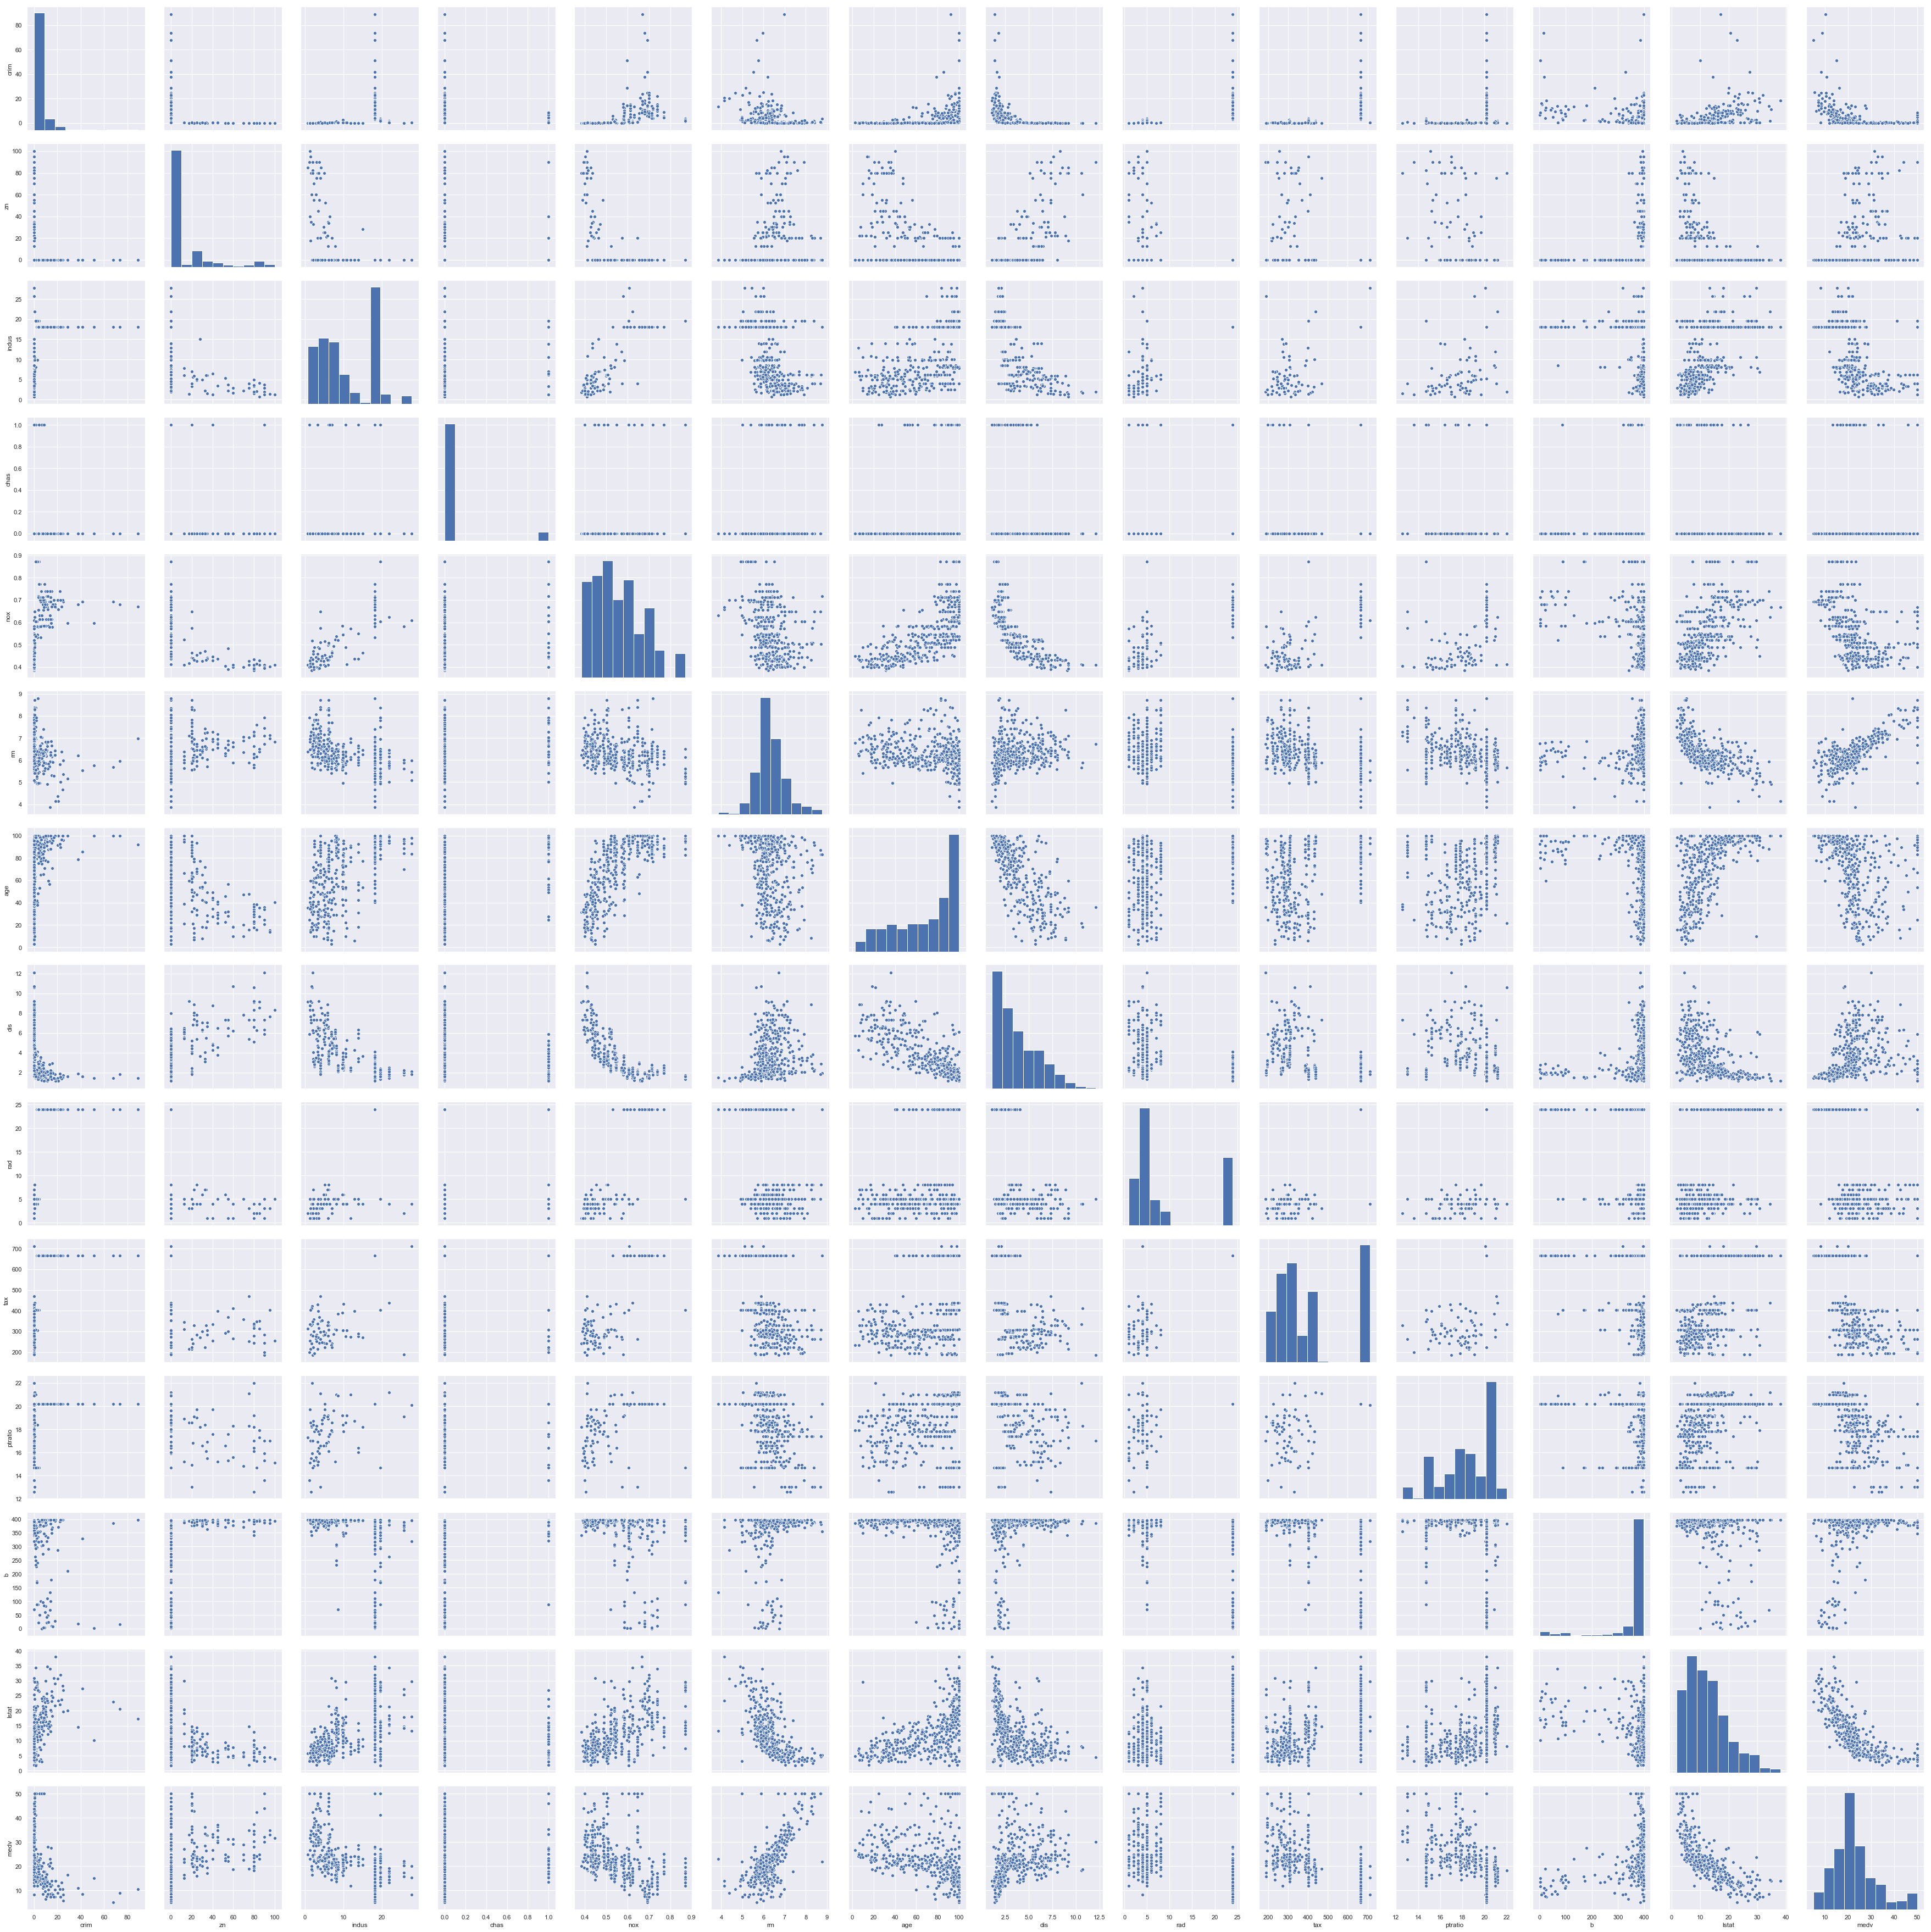

In [145]:
cols = df_train.columns
sns.set()
sns.pairplot(df_train[cols], height = 3.5)
plt.show();

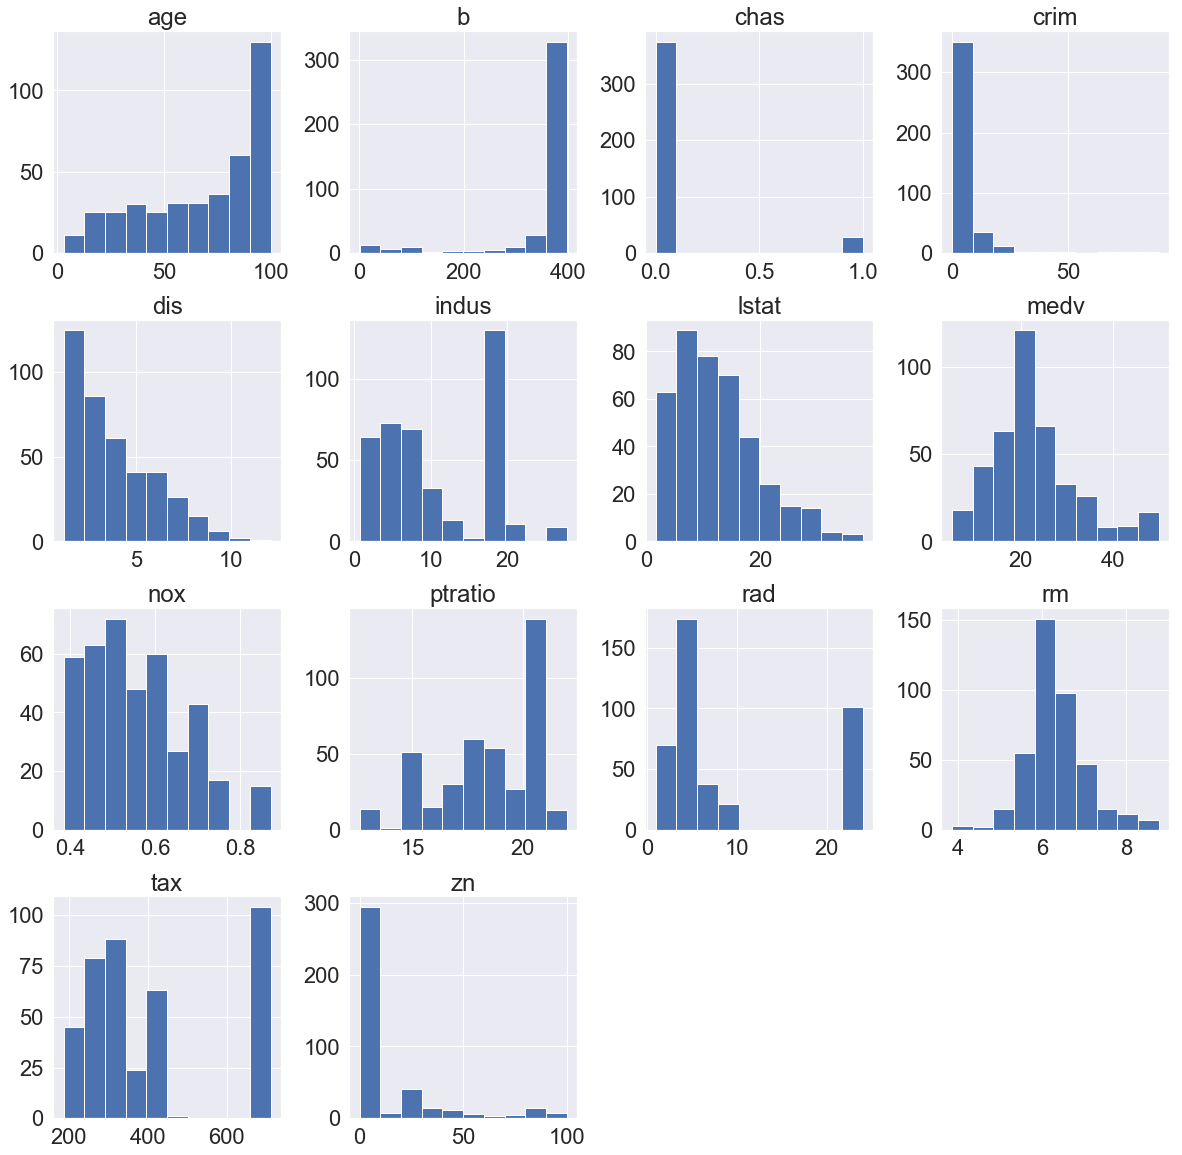

In [240]:
df_train.hist(figsize=[20,20]);

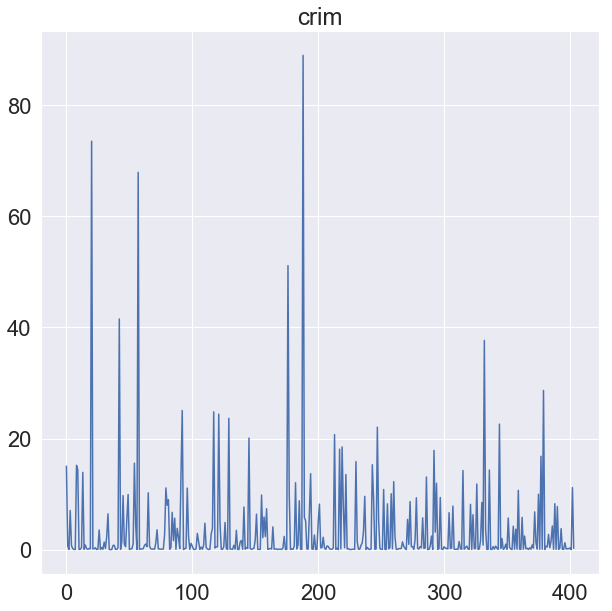

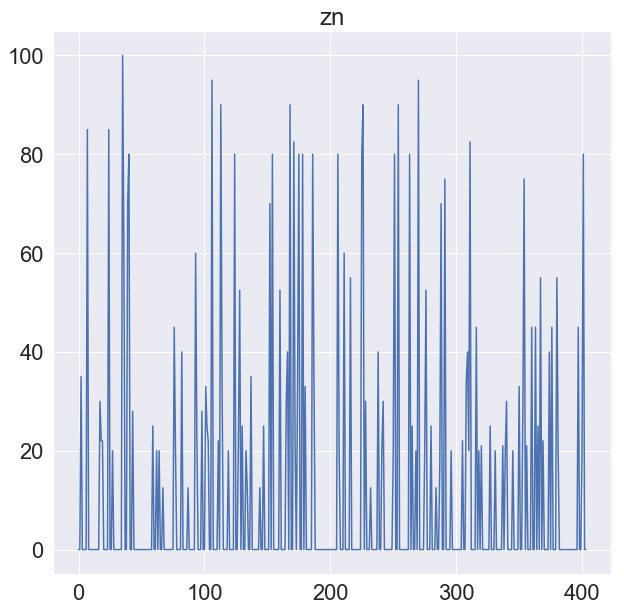

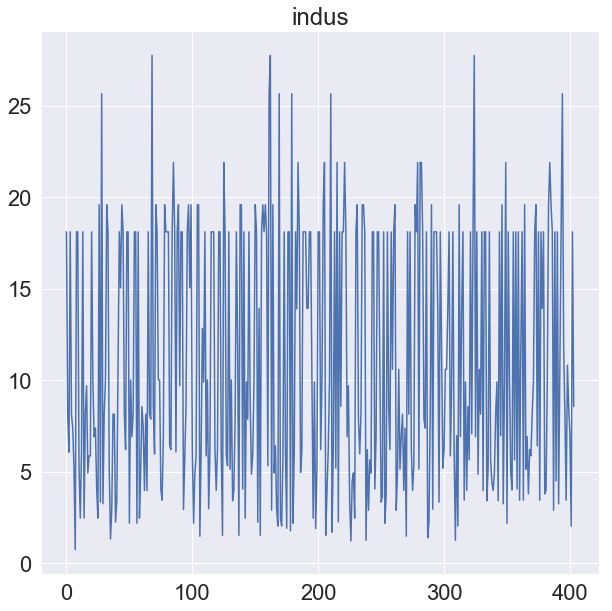

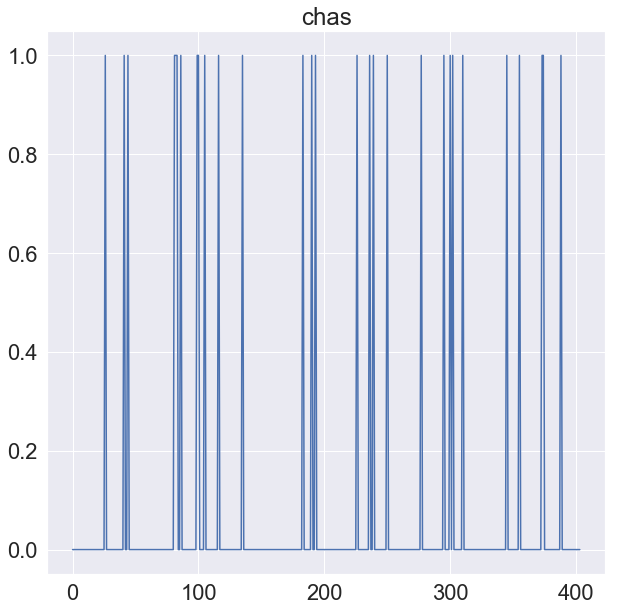

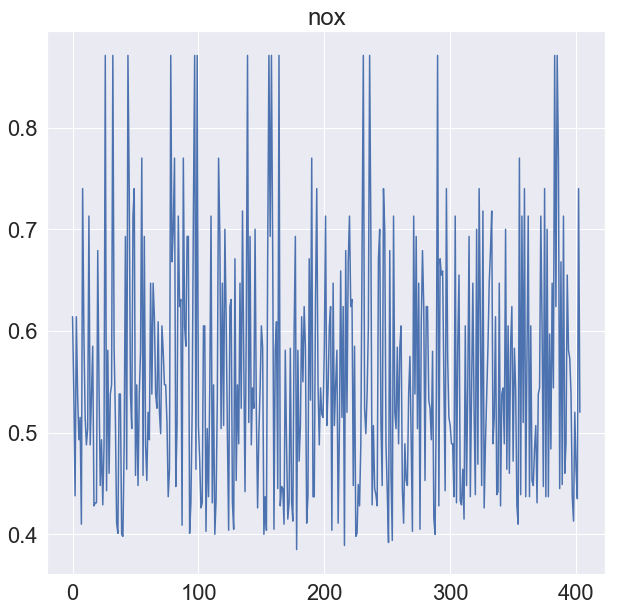

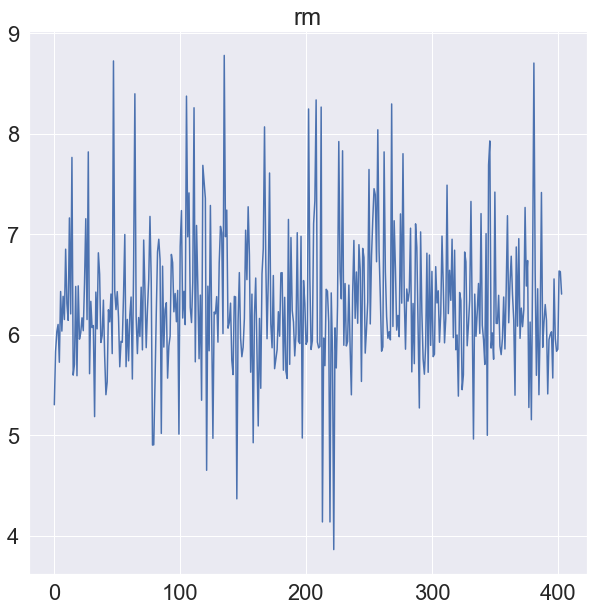

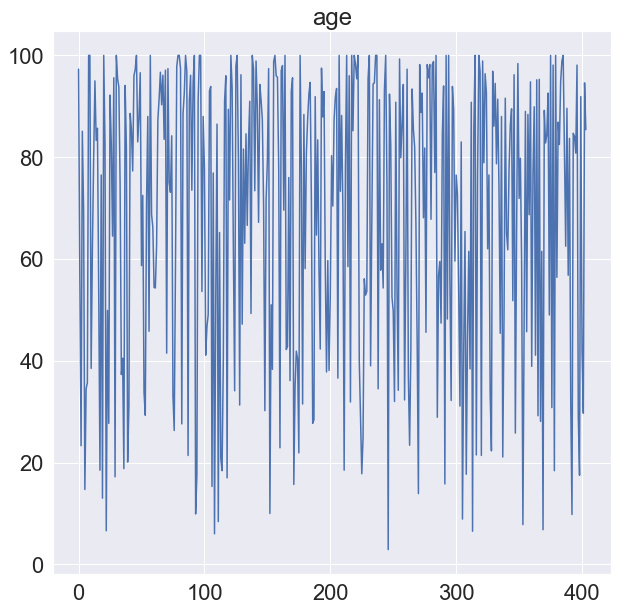

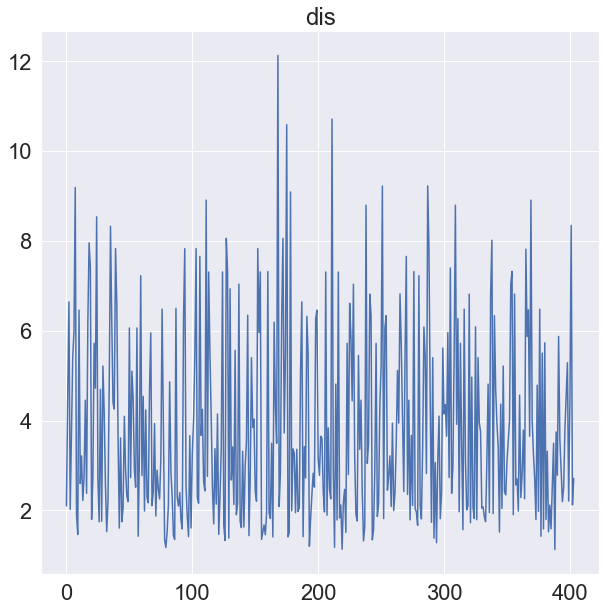

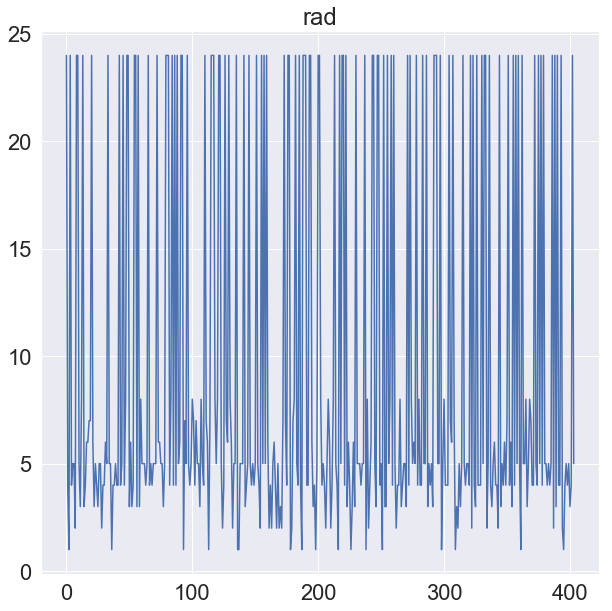

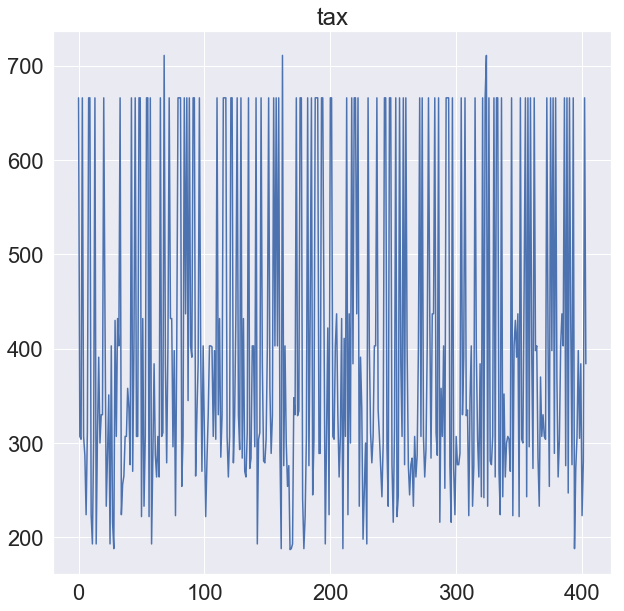

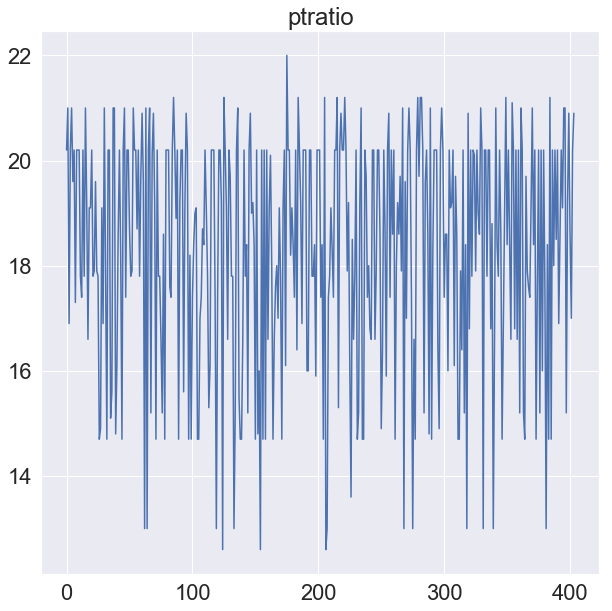

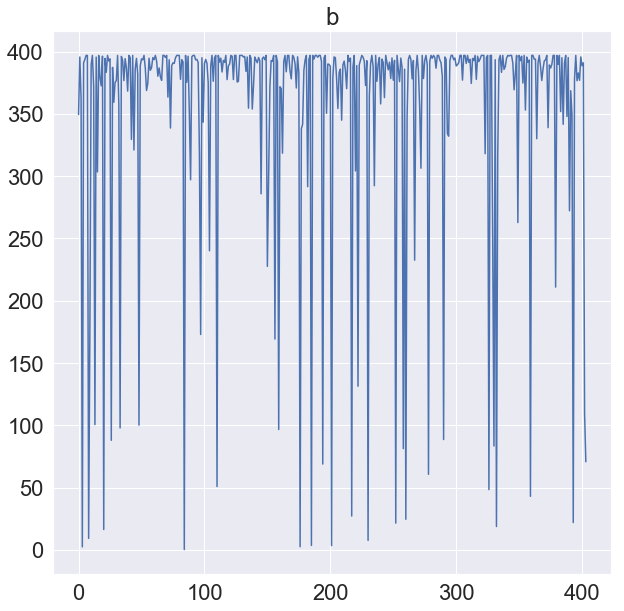

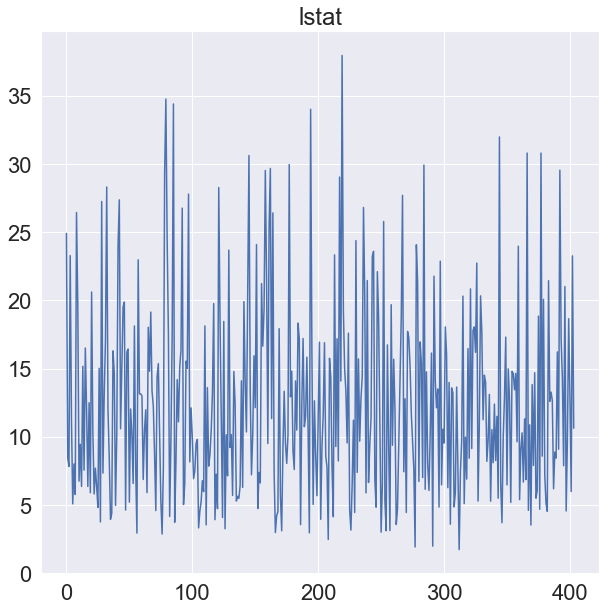

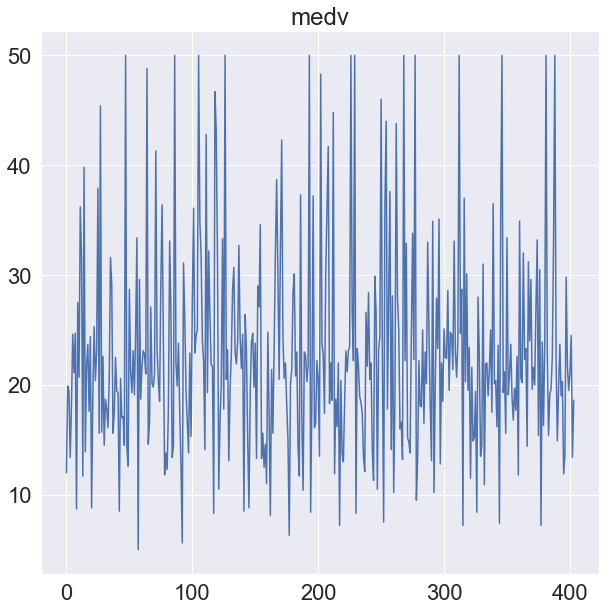

In [241]:
for i in df_train.columns:
    plt.figure(figsize=[10,10])
    plt.plot(df_train[i])
    plt.title(i);

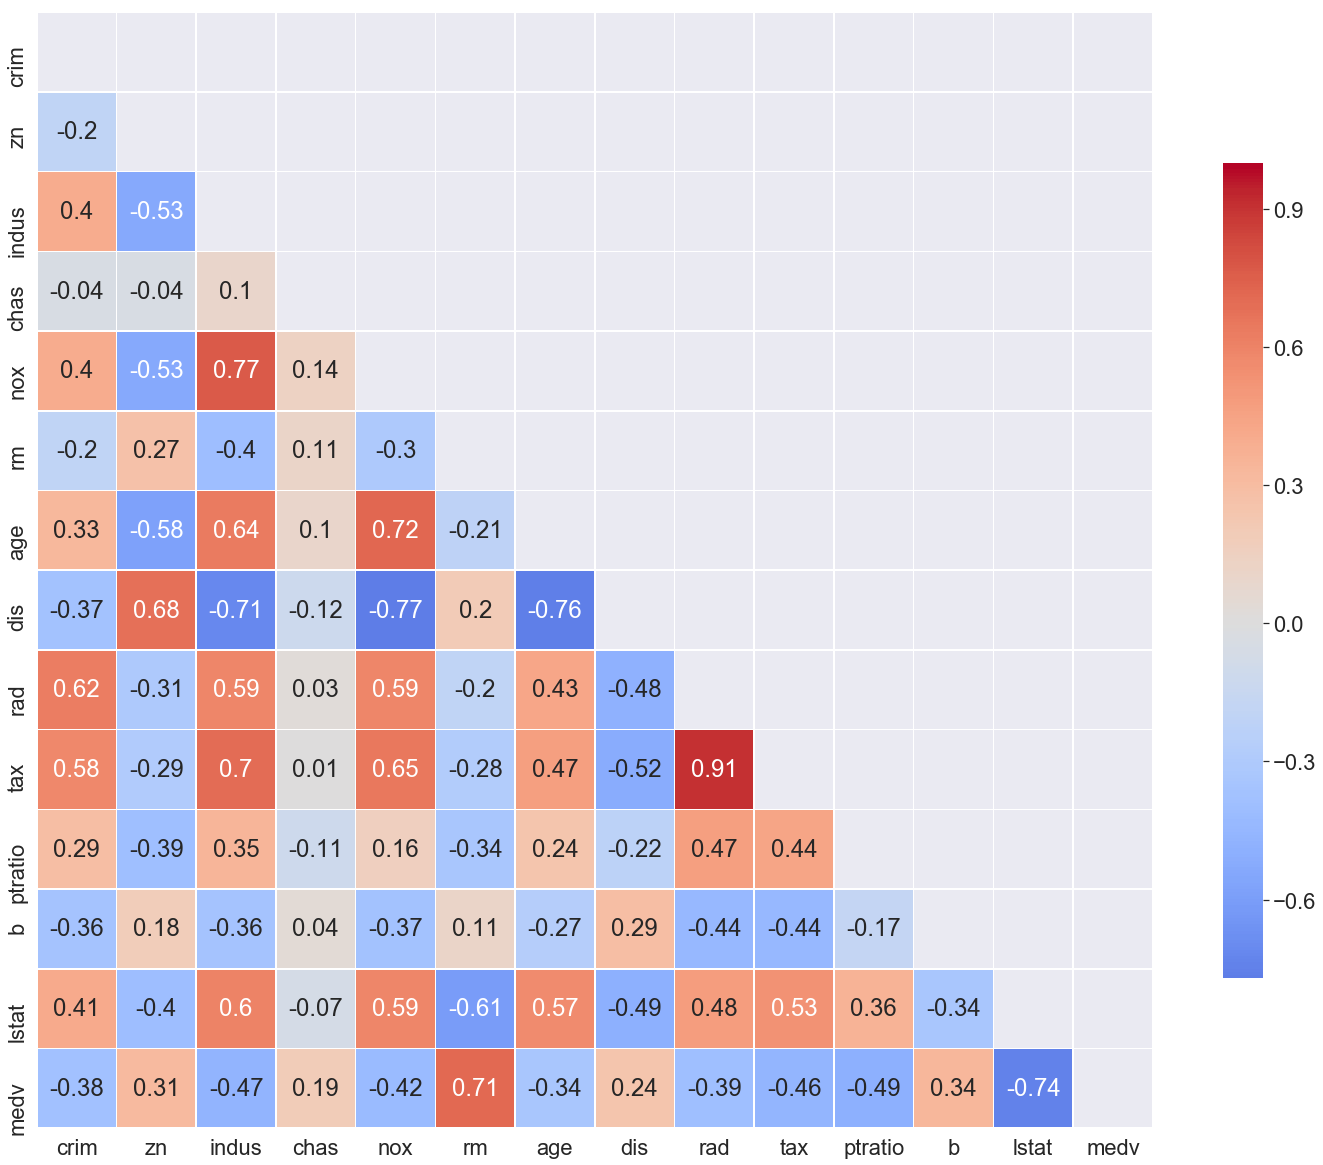

In [242]:
# Correlation between all features
# depndent variable MEDV !!!
corr = df_train.corr()
corr = corr.round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,30))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0, square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .5});

In [243]:
corr40 = corr[abs(corr['medv']) > 0.4]

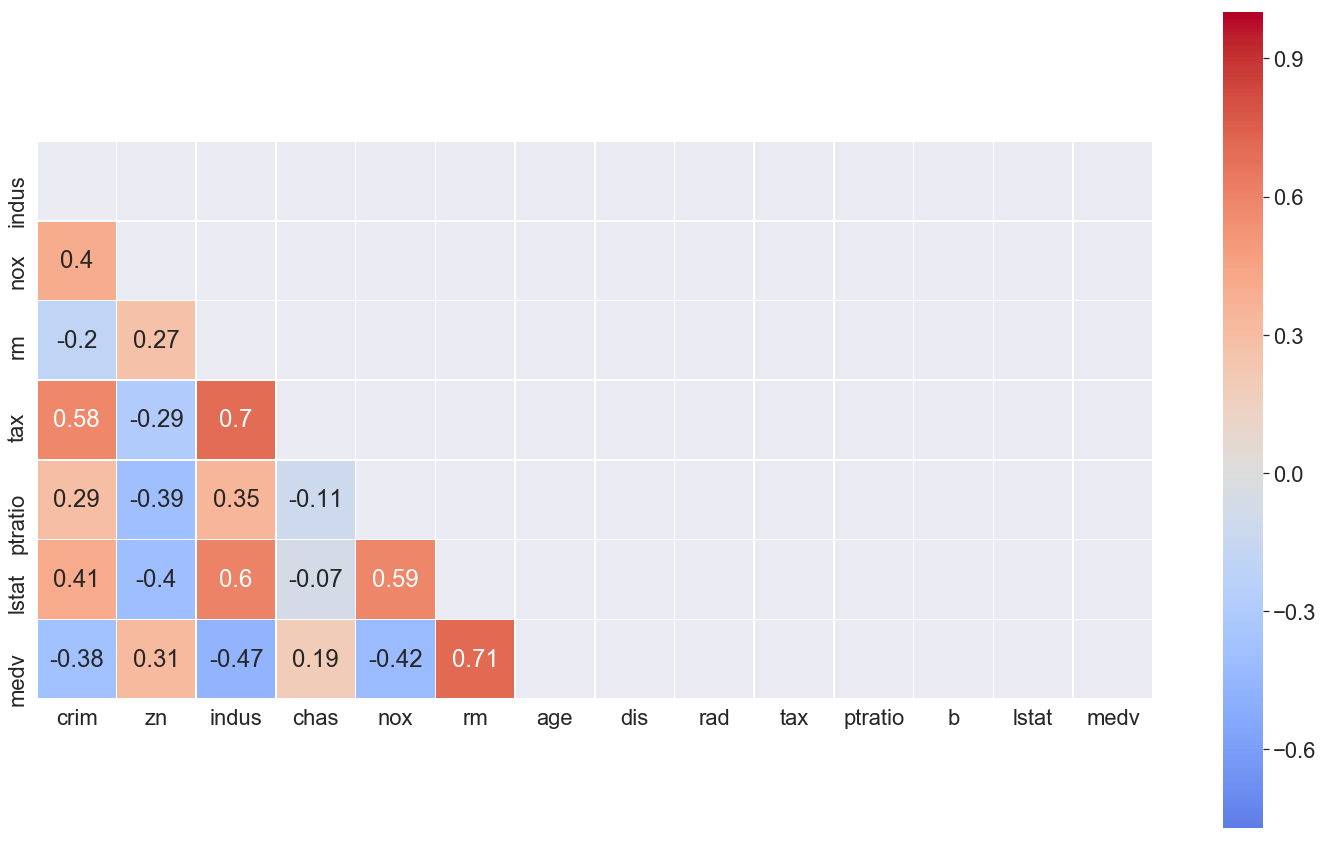

In [244]:
mask = np.zeros_like(corr40)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,30))
sns.set(font_scale=2)
sns.heatmap(corr40, mask=mask, cmap='coolwarm', vmax=1, center=0, square=True, linewidths=.5, 
            annot=True, cbar_kws={"shrink": .5});

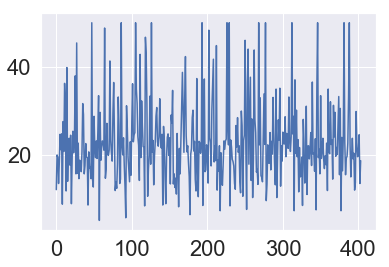

In [245]:
plt.plot(df_train.medv);

In [246]:
# MODEL 1

# Modelling with the 5 MOST significant features

model = 'medv ~ crim + zn + indus + C(chas) + nox + rm + lstat'
smf.ols(formula=model, data=df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 07 Nov 2019   Prob (F-statistic):           3.19e-92
Time:                        11:45:04   Log-Likelihood:                -1248.9
No. Observations:                 404   AIC:                             2514.
Df Residuals:                     396   BIC:                             2546.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.2425      3.660     -1.159      0.247     -11.438       2.953
C(chas)[T.1]     4.0478      1.073      3.774      0.000       1.939       6.156
crim            -0.1175      0.034     -3.425      0.001      -0.185      -0.050
zn               0.0016      0.014      0.116      0.907      -0.026       0.029
indus           -0.0265      0.066     -0.399      0.690      -0.157       0.104
nox              0.1630      3.881      0.042      0.967      -7.467       7.793
rm               5.4129      0.489     11.073      0.000       4.452       6.374
lstat           -0.5485      0.059     -9.250      0.000      -0.665      -0.432
==============================================================================
Omnibus:                      117.610   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.892
Skew:                           1.270   Prob(JB):                     3.30e-93
Kurtosis:                       7.342   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
df_train.head()

crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
0  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
1   0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
2   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
3   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
4   0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   

   ptratio       b  lstat  medv  
0     20.2  349.48  24.91  12.0  
1     21.0  395.62   8.47  19.9  
2     16.9  362.25   7.83  19.4  
3     20.2    2.52  23.29  13.4  
4     21.0  390.95  11.28  18.2

In [179]:
# Polynpomial regression with splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly_reg = PolynomialFeatures(degree=4)
#X = df_train.crim.values
#X = X.reshape(-1, 1)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)
y_pred_poly_train = pol_reg.predict(X_train_poly)
y_pred_poly_test = pol_reg.predict(X_test_poly)

print('Train MSE:  ' +str(mean_squared_error(y_train, y_pred_poly_train)))
print('Test MSE:  ' +str(mean_squared_error(y_test, y_pred_poly_test)))
print('Train R2:  ' +str(r2_score(y_train, y_pred_poly_train)))
print('Test R2:  ' +str(r2_score(y_test, y_pred_poly_test)))

# run a for loop for best MSE by changing degree

# Next step: K-fold cross validation

Train MSE:  1.961637115239284e-19
Test MSE:  80552.24293068367
Train R2:  1.0
Test R2:  -1080.04813411377


In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=10)

rmse = []
r2 = []
for i in np.arange(1,6):
    poly_features = PolynomialFeatures(degree = i)
  
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
  
    y_train_predicted = poly_model.predict(X_train_poly)
  
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
#rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
#r2_train = r2_score(Y_train, y_train_predicted)
#rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
#r2_test = r2_score(Y_test, y_test_predict)
 
    
    rmse.append(np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2.append(r2_score(Y_test, y_test_predict))

#print("The model performance for the training set")
#print("-------------------------------------------")
#print("RMSE of training set is {}".format(rmse_train))
#print("R2 score of training set is {}".format(r2_train))
  
#print("\n")
  
#print("The model performance for the test set")
#print("------------------------------------------")
#print("RMSE of test set is {}".format(rmse_test))
#print("R2 score of test set is {}".format(r2_test))

In [231]:
rmse

[5.866341999333027,
 3.6156419927890355,
 321.2300057213456,
 276.14240858246757,
 184.54527437950046]

Text(0.5, 0, 'degree')

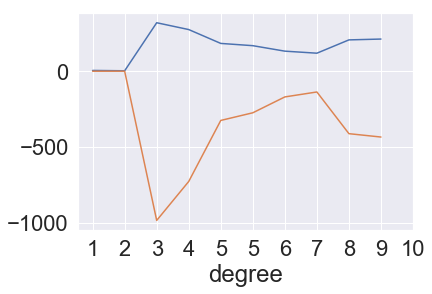

In [227]:
plt.plot(rmse)
plt.plot(r2)
plt.xticks(np.arange(11),('1','2','3','4','5','5','6','7','8','9','10'))
plt.xlabel('degree')



In [194]:
# K-Fold

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf)  
KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282

KeyError: '[ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68\n  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86\n  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104\n 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122\n 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140\n 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158\n 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176\n 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194\n 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212\n 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230\n 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248\n 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266\n 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284\n 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302\n 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320\n 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338\n 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356\n 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374\n 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392\n 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410\n 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428\n 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446\n 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464\n 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482\n 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500\n 501 502 503 504 505] not in index'